In [119]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split # Dividir os dados em treino e teste
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder # Transforma dados categóricos em informações numéricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report 
from yellowbrick.classifier import ConfusionMatrix # Criar uma matriz de confusão

In [121]:
base = pd.read_csv('insurance.csv')
base
# Basicamente características de pessoas que querem seguro

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [122]:
base = base.drop(columns= ['Unnamed: 0'])
base = base.fillna('None')
base

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [123]:
# A classe que vamos tentar prever é a 'Assident'
base.shape

(20000, 27)

In [124]:
y = base.iloc[:,7].values
x = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values

In [125]:
x

array([[False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many'],
       [False, 'Senior', 'Prole', ..., True, 'Thousand', 'Zero'],
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'One'],
       ...,
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero']],
      shape=(20000, 26), dtype=object)

In [126]:
labelencoder = LabelEncoder()

In [127]:
for i in range(x.shape[1]):
  if x[:,i].dtype == 'object':
    x[:,i] = labelencoder.fit_transform(x[:,i])

In [128]:
x

array([[0, 1, 1, ..., 0, 3, 0],
       [0, 2, 1, ..., 1, 3, 2],
       [0, 2, 2, ..., 1, 3, 1],
       ...,
       [0, 2, 2, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2]], shape=(20000, 26), dtype=object)

In [129]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y,test_size=0.3, random_state=1)

In [130]:
modelo = GaussianNB()
modelo.fit(X_treinamento,y_treinamento)

GaussianNB()

In [132]:
previsoes = modelo.predict(x_teste)

In [133]:
previsoes

array(['Mild', 'Mild', 'Mild', ..., 'Mild', 'Mild', 'Mild'],
      shape=(6000,), dtype='<U8')

In [144]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average=None)
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')

In [145]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.15083333333333335
[0.10227273 0.35362319 0.         1.        ]
0.15083333333333335
0.06778231457195423


In [146]:
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

        Mild       0.10      0.93      0.18       542
    Moderate       0.35      0.72      0.48       505
        None       0.00      0.00      0.00      4228
      Severe       1.00      0.05      0.09       725

    accuracy                           0.15      6000
   macro avg       0.36      0.43      0.19      6000
weighted avg       0.16      0.15      0.07      6000



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

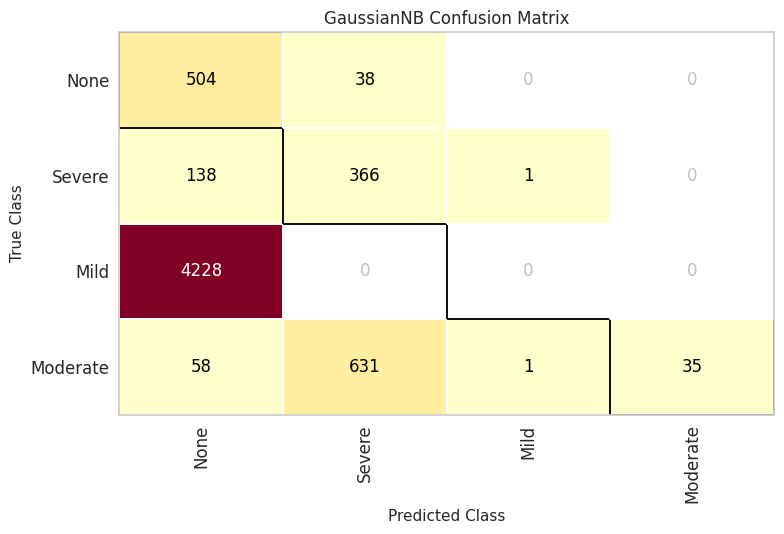

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [148]:
confusion = ConfusionMatrix(modelo, classes=['None', 'Severe', 'Mild', 'Moderate'])
confusion.fit(x_treinamento, y_treinamento)
confusion.score(x_teste, y_teste)
confusion.poof()

In [ ]:
dot_data = export_graphviz